## Code for long summary and RM Anova 

In [1]:
import os
os.chdir('..')
import sparklyRGT as rgt 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import scipy.stats as stats
import seaborn as sns
import pingouin as pg
pd.options.mode.chained_assignment = None
pd.set_option('display.max_rows',100)

I am being executed!


***

# 1) Load data into Python



In [2]:
file_names = ['BH07_raw_free_S29-30.xlsx'] 

df = rgt.load_data(file_names)

df.head()
# df[['Chosen', 'option']]


,MSN,StartDate,StartTime,Subject,Group,Box,Experiment,Comment,Session,Trial,...,Pun_Persev_H5,Pun_HeadEntry,Pun_Dur,Premature_Resp,Premature_Hole,Rew_Persev_H1,Rew_Persev_H2,Rew_Persev_H3,Rew_Persev_H4,Rew_Persev_H5
0,rGT_A-cue,2020-10-09,11:01:00,25,0.0,1,0.0,NaN,29,1.0,...,3,3,30,0,0,0,0,0,0,0
1,rGT_A-cue,2020-10-09,11:01:00,25,0.0,1,0.0,NaN,29,2.1,...,0,0,0,1,5,0,0,0,0,0
2,rGT_A-cue,2020-10-09,11:01:00,25,0.0,1,0.0,NaN,29,2.0,...,3,2,30,0,0,0,0,0,0,0
3,rGT_A-cue,2020-10-09,11:01:00,25,0.0,1,0.0,NaN,29,3.0,...,0,0,0,0,0,0,0,0,0,0
4,rGT_A-cue,2020-10-09,11:01:00,25,0.0,1,0.0,NaN,29,4.0,...,2,2,30,0,0,0,0,0,0,0


***
# 2A) Baseline & Acquisition Analysis


In [3]:
control_group = [] #In this example: Tg negative rats

exp_group = [] #In this example: Tg positive rats

group_names = {0: '',
              1: ''} 

group_list = []

title = '' #for plotting

startsess = 29 #first session you would like to include in figures
endsess = 30 #last session you would like to include in figures

## Data cleaning

### Check session numbers for each rat

In [4]:
# rgt.check_sessions(df)

### Drop/edit session numbers

In [5]:
df2 = rgt.drop_sessions(df, [28])

### Check that you dropped/edited the desired session(s)

In [6]:
# rgt.check_sessions(df2) 

## Data processing

### Calculate variables for each rat


In [36]:
df_sum = rgt.get_summary_data(df2) #change to df instead of df2 if you didn't do any session editing
df_sum

,29P1,29P2,29P3,29P4,30P1,30P2,30P3,30P4,risk29,risk30,collect_lat29,collect_lat30,choice_lat29,choice_lat30,omit29,omit30,trial29,trial30,prem29,prem30
1,90.8397,0.0000,8.3969,0.7634,83.0645,0.0000,16.9355,0.0000,81.6794,66.1290,1.0772,1.2865,0.6383,0.6553,0,0,131.1000,124.0000,26.4045,24.8485
2,9.3333,65.3333,10.6667,14.6667,4.9383,76.5432,0.0000,18.5185,49.3333,62.9630,1.6074,1.3875,1.0577,1.2490,1,0,76.1000,81.0000,30.2752,33.6066
3,2.1739,8.6957,56.5217,32.6087,0.0000,11.6279,67.4419,20.9302,-78.2609,-76.7442,1.0233,1.0265,2.8333,3.6528,3,2,49.0000,45.0000,3.9216,6.2500
4,5.8824,73.5294,4.9020,15.6863,13.4021,64.9485,3.0928,18.5567,58.8235,56.7010,1.2637,1.1334,1.0010,0.8853,1,0,103.0000,97.0000,13.4454,24.2188
5,0.0000,1.5385,98.4615,0.0000,9.3750,7.8125,79.6875,3.1250,-96.9231,-65.6250,0.8072,1.0989,3.1358,3.1763,3,5,68.1000,69.0000,8.1081,16.8675
6,2.5000,70.0000,0.0000,27.5000,2.9412,63.2353,0.0000,33.8235,45.0000,32.3529,1.0557,1.0611,2.1720,1.8593,8,7,88.0000,75.0000,9.2784,15.7303
7,3.0769,10.7692,64.6154,21.5385,1.8182,10.9091,69.0909,18.1818,-72.3077,-74.5455,0.8394,0.9296,1.0126,1.1945,0,0,65.0000,56.1000,16.6667,34.5238
8,2.4194,92.7419,0.8065,4.0323,2.4793,94.2149,1.6529,1.6529,90.3226,93.3884,1.7916,1.7244,1.8505,1.9560,0,0,124.0000,121.0000,10.1449,12.9496
9,3.2787,3.2787,90.1639,3.2787,5.2632,7.0175,82.4561,5.2632,-86.8852,-75.4386,0.7480,0.7114,2.3003,2.7542,1,4,62.0000,61.0000,20.5128,11.5942
11,10.6870,88.5496,0.7634,0.0000,8.1481,91.1111,0.0000,0.7407,98.4733,98.5185,1.4067,1.5439,1.9502,1.6679,1,0,132.0000,136.1000,2.2222,7.5342


In [8]:
pd.options.display.float_format = '{:.4f}'.format

In [39]:
subs = df2.Subject.unique() #list of subjects
subs.sort() 

sess = list(df2.Session.unique())
all_sess = []
for i in range(len(subs)): #for all subjects 
    all_sess.append(sess) #all_sess is now a list of lists (sess)

df_temp = df2.groupby(['Subject','Session'],as_index=False)['Trial'].max()
df_temp.drop('Trial', inplace=True, axis=1)

column_names = ['P1','P2','P3','P4'] #for P1-P4 

for col in column_names:
    df_temp[col] = [0] * len(df_temp) #create a column of zeros for the length
    for session in sess: #for each session
        for rat in subs: #for each subject
            idx = df_temp.loc[np.logical_and(df_temp['Subject'] == rat, df_temp['Session'] == session)].index.values
            df_temp.at[idx, col] = df_sum.at[rat, str(session) + col] 
            
column_names = ['risk','collect_lat','choice_lat','omit','trial','prem'] #for variables ending in session

for col in column_names:
    df_temp[col] = [0] * len(df_temp)
    for session in sess:
        for rat in subs:
            idx = df_temp.loc[np.logical_and(df_temp['Subject'] == rat, df_temp['Session'] == session)].index.values
            df_temp.at[idx, col] = df_sum.at[rat, col + str(session)]
            
# df_temp

## Test RM anova

In [10]:
import statsmodels.api as sm
import pandas as pd
from patsy import dmatrices
from statsmodels.stats.anova import AnovaRM

Method: 

Create a new dataframe, with the within-subject factor (session), dependent variable (mean_risk_score), and subject identifier ('Subject') 
Input those columns into the AnovaRM function 

In [11]:
aovrm = AnovaRM(df_temp, 'risk', 'Subject', within=['Session'])
res = aovrm.fit()
print(res)

                Anova
        F Value Num DF  Den DF Pr > F
-------------------------------------
Session  1.4394 1.0000 30.0000 0.2396



Method 2: Create a function that takes in all the outcome variables and sessions, and runs a repeated-measures ANOVA on those variables across the sessions

In [40]:
def get_long_summary_data(df_edited, df_sum, task = None): 
    "takes in the edited df (after dropping subjects and sessions) and wide-summary df, and outputs a long-summary df"
    subs = df_edited.Subject.unique() #list of subjects
    subs.sort() 

    sess = list(df_edited.Session.unique())
    sess.sort()
    all_sess = []
    for i in range(len(subs)): #for all subjects 
        all_sess.append(sess) #all_sess is now a list of lists (sess)

    df_temp = df_edited.groupby(['Subject','Session'],as_index=False)['Trial'].max()
    df_temp.drop('Trial', inplace=True, axis=1)

    if task == 'choiceRGT':
        choice_names = ['P1_C','P2_C','P3_C','P4_C','P1_U','P2_U','P3_U','P4_U']
    else:
        choice_names = ['P1','P2','P3','P4'] #for P1-P4 

    for col in choice_names:
        df_temp[col] = [0] * len(df_temp) #create a column of zeros for the length
        for session in sess: #for each session
            for rat in subs: #for each subject
                idx = df_temp.loc[np.logical_and(df_temp['Subject'] == rat, df_temp['Session'] == session)].index.values
                df_temp.at[idx, col] = df_sum.at[rat, str(session) + col] 

    if task == 'choiceRGT':
        column_names = ['risk_cued','risk_uncued','co_lat_cued','co_lat_uncued','ch_lat_cued','ch_lat_uncued',
                        'cued_lev_lat','uncued_lev_lat','cued_omit','uncued_omit','lev_omit','trial_init','prem_cued','prem_uncued','pref']
    else:
        column_names = ['risk','collect_lat','choice_lat','omit','trial','prem'] #for variables ending in session

    for col in column_names:
        df_temp[col] = [0] * len(df_temp)
        for session in sess:
            for rat in subs:
                idx = df_temp.loc[np.logical_and(df_temp['Subject'] == rat, df_temp['Session'] == session)].index.values
                df_temp.at[idx, col] = df_sum.at[rat, col + str(session)]

    return df_temp

get_long_summary_data(df2, df_sum)

,Subject,Session,P1,P2,P3,P4,risk,collect_lat,choice_lat,omit,trial,prem
0,1,29,90.8397,0.0000,8.3969,0.7634,81.6794,1.0772,0.6383,0,131.1000,26.4045
1,1,30,83.0645,0.0000,16.9355,0.0000,66.1290,1.2865,0.6553,0,124.0000,24.8485
2,2,29,9.3333,65.3333,10.6667,14.6667,49.3333,1.6074,1.0577,1,76.1000,30.2752
3,2,30,4.9383,76.5432,0.0000,18.5185,62.9630,1.3875,1.2490,0,81.0000,33.6066
4,3,29,2.1739,8.6957,56.5217,32.6087,-78.2609,1.0233,2.8333,3,49.0000,3.9216
5,3,30,0.0000,11.6279,67.4419,20.9302,-76.7442,1.0265,3.6528,2,45.0000,6.2500
6,4,29,5.8824,73.5294,4.9020,15.6863,58.8235,1.2637,1.0010,1,103.0000,13.4454
7,4,30,13.4021,64.9485,3.0928,18.5567,56.7010,1.1334,0.8853,0,97.0000,24.2188
8,5,29,0.0000,1.5385,98.4615,0.0000,-96.9231,0.8072,3.1358,3,68.1000,8.1081
9,5,30,9.3750,7.8125,79.6875,3.1250,-65.6250,1.0989,3.1763,5,69.0000,16.8675


In [32]:
def get_baseline(df_long_sum, variables = None, sessions = None): 
    "Takes in long-summary data (dataframe), outcome variables (list) and sessions (list) and runs a RM ANOVA on those variables across those sessions."
    "If nothing is passed to variables or sessions, the RM ANOVA will be run on all variables and sessions in df_long_sum"
    "Must pass at least 2 session numbers to sessions"
    "The function will output multiple print statements outlining which variables are unstable (first list), and which are stable (second list)"
    
    #can edit to take wide summary data (and just use get_long_summary_data as a helper function)***
    
    #filter rows by sessions, and select columns by variables
    if variables == None: 
        variables = ['risk','collect_lat','choice_lat','omit','trial','prem'] #run all variables
    if sessions != None:
        df_long_sum = df_long_sum[df_long_sum.Session.isin(sessions)] 
    else:
        sessions = list(df_long_sum.Session.unique())
    
    #run anova
    unstable_dict = {}
    stable_dict = {}
    for var in variables: 
        res = pg.rm_anova(dv=var, within='Session', subject='Subject', data=df_long_sum, detailed=True)
        pval = res['p-unc'][0]
        if pval < 0.05: 
            unstable_dict[var]=pval
        else: 
            stable_dict[var]=pval
            
    #return unstable and stable list
    return unstable_dict, stable_dict

get_baseline(df_temp, variables = ['risk'], sessions = [29,30])

({}, {'risk': 0.23962197898538815})

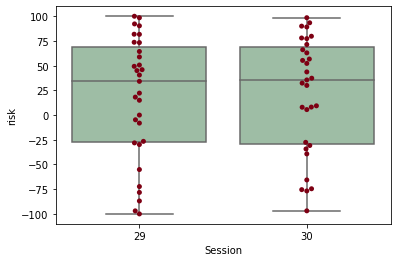

In [14]:
ax = sns.boxplot(x='Session', y='risk', data=df_temp, color='#99c2a2')
ax = sns.swarmplot(x="Session", y="risk", data=df_temp, color='#7d0013')
plt.show()

In [20]:
res = pg.rm_anova(dv='risk', within='Session', subject='Subject', data=df_temp, detailed=True)
res['p-unc'][0] #selected out p-value! 
res #corresponds with statsmodels...anovaRM

,Source,SS,DF,MS,F,p-unc,np2,eps
0,Session,198.1631,1,198.1631,1.4394,0.2396,0.0458,1.0000
1,Error,4130.0451,30,137.6682,nan,nan,nan,nan
